In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
#Define feature and target names
X_desc = iris.feature_names
y_desc = iris.target_names

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=60)

In [20]:
#Define range of max_depth values to test:
#Decision trees do not have ccuracy/loss curves, so visualize accuracy change with different tree depths
max_depth_values= range(1,11)

In [21]:
#Store train and test accuracies
train_accuracies = []
test_accuracies = []

In [22]:
# Train decision tree classifiers with different max_depth values
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    print(f"Max Depth: {max_depth}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

Max Depth: 1, Train Accuracy: 0.6666666666666666, Test Accuracy: 0.6666666666666666
Max Depth: 2, Train Accuracy: 0.9666666666666667, Test Accuracy: 0.95
Max Depth: 3, Train Accuracy: 0.9777777777777777, Test Accuracy: 0.9833333333333333
Max Depth: 4, Train Accuracy: 0.9888888888888889, Test Accuracy: 0.9833333333333333
Max Depth: 5, Train Accuracy: 1.0, Test Accuracy: 0.95
Max Depth: 6, Train Accuracy: 1.0, Test Accuracy: 0.9833333333333333
Max Depth: 7, Train Accuracy: 1.0, Test Accuracy: 0.9333333333333333
Max Depth: 8, Train Accuracy: 1.0, Test Accuracy: 0.95
Max Depth: 9, Train Accuracy: 1.0, Test Accuracy: 0.95
Max Depth: 10, Train Accuracy: 1.0, Test Accuracy: 0.95


In [23]:
# Predict on the test set
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [24]:
#Print the classification report
print(classification_report(y_test, y_pred_test, target_names=y_desc))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       0.88      0.94      0.91        16
   virginica       0.95      0.90      0.92        20

    accuracy                           0.95        60
   macro avg       0.94      0.95      0.94        60
weighted avg       0.95      0.95      0.95        60



In [28]:
# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print the accuracies
print('Accuracy of Decision Tree-Train: ', accuracy_train)
print('Accuracy of Decision Tree-Test: ', accuracy_test)

print("Number of mislabeled points out of a total %d points: %d" % (X_test.shape[0], (y_test != y_pred_test).sum()))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.95
Number of mislabeled points out of a total 60 points: 3


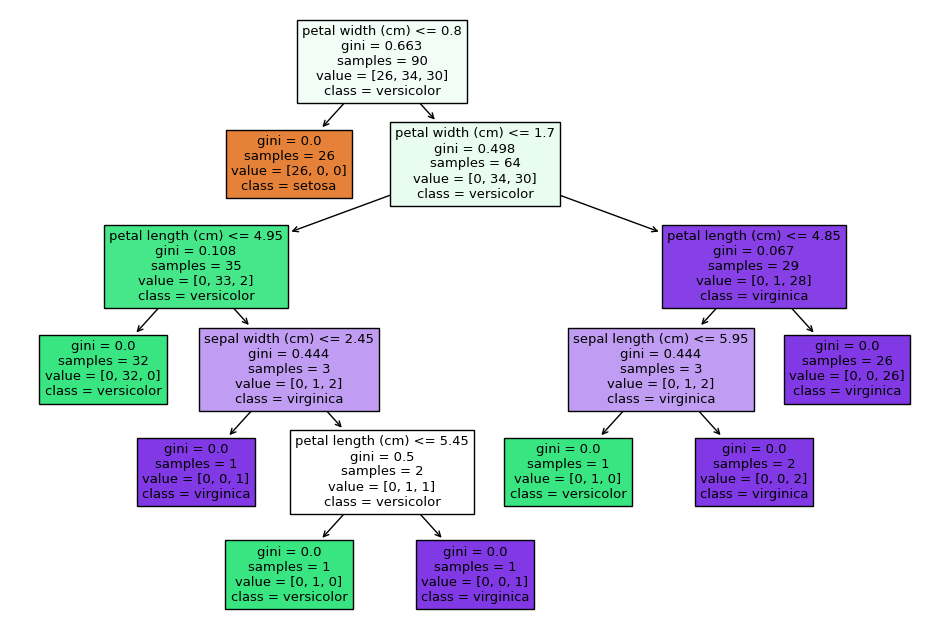

In [26]:
# Display the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()